In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("max_colwidth", 400)

import json


Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
489,application_1632762077345_0491,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
path_raw = 's3://mist-secorapp-production/ap-events/ap-events-production/dt=2021-11-*/*'
ap_raw = sc.sequenceFile(path_raw)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
oc_raw = ap_raw.map(lambda x: json.loads(x[1]))


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
data_list = oc_raw.filter(lambda x: x.get("source") is not None and x.get("source").get("ev_name") is not None and x['source']['ev_name'] == 'SW_PORT_BPDU_BLOCKED').collect()
df = pd.json_normalize(data_list)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
df.groupby(['switch_id']).size().sort_values(ascending=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

switch_id
68f38e0b3386    18855
68f38e0b56f6    14810
5800bbba4277     4190
c042d0dc5440      602
f04b3a962ae0      227
0c599c8336d9       43
e8a24517eaad       11
408f9dbfe4d0       11
f4b52f425260        8
f4a7391cd8b0        8
4c6d586e3925        8
e8a24517e237        6
f4bfa803d400        6
408f9dcd367f        5
e030f95b36e4        5
a4e11a3aec65        5
c042d0f9cac7        5
408f9dcd3da0        4
8890094b6404        4
00cc34ab9e4c        4
8403280bf88b        4
8403280bd6c6        3
20d80b2013c0        3
889009357fb2        3
c0bfa70221a0        3
f4bfa816d900        3
cce194b15520        2
e45d3762d092        2
e45d37e1f7a0        2
88900935777e        2
cce194ec6e40        2
e030f94d1b35        2
ec94d533e89c        2
40deadf999f5        2
00cc34ac0c68        2
544b8c180dae        2
50c7099553f6        2
2c2131713960        2
fc3342e9937a        1
e45d375a1d6a        1
f4bfa8158000        1
f4a739c60490        1
f04b3a919e20        1
e45d37676fdf        1
ec94d5356318        1


In [38]:
data_list = oc_raw.filter(lambda x: x.get("switch_id") == "f04b3a962ae0").filter(lambda x: x.get("source") is not None and x.get("source").get("ev_name") is not None and x['source']['ev_name'] == 'SW_PORT_BPDU_BLOCKED').collect()
df = pd.json_normalize(data_list)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
df.shape

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(227, 18)

In [7]:
df.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Index(['event_type', 'site_id', 'org_id', 'timestamp', 'device_type',
       'switch_id', 'source.org', 'source.site', 'source.mac', 'source.model',
       'source.ev_name', 'source.fw_version', 'source.version', 'source.ev_ts',
       'source.port_id', 'source.detail', 'source.client',
       'source.device_type'],
      dtype='object')

In [8]:
a = df['source.detail'].unique()
a

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array(['L2CPD_RECEIVE_BPDU_BLOCK_ENABLED: BPDU_PROTECT: Interface ge-1/0/37 is DOWN: BPDU error detected'],
      dtype=object)

In [9]:
b = df['source.port_id'].unique()
b

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array(['ge-1/0/37'], dtype=object)

In [10]:
data_list[0]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'event_type': 'device_events', 'site_id': '99becb91-9980-4653-83f0-7a222bad655c', 'org_id': 'f3b7e7bb-d8dd-4445-bf34-e805c6f25ef4', 'timestamp': 1635729848000000, 'source': {'org': 'f3b7e7bb-d8dd-4445-bf34-e805c6f25ef4', 'site': '99becb91-9980-4653-83f0-7a222bad655c', 'mac': 'f04b3a962ae0', 'model': 'EX4300-48P', 'ev_name': 'SW_PORT_BPDU_BLOCKED', 'fw_version': '18.4R2-S8', 'version': 1, 'ev_ts': 1635729848, 'port_id': 'ge-1/0/37', 'detail': 'L2CPD_RECEIVE_BPDU_BLOCK_ENABLED: BPDU_PROTECT: Interface ge-1/0/37 is DOWN: BPDU error detected', 'client': '00-00-00-00-00-00', 'device_type': 'switch'}, 'device_type': 'switch', 'switch_id': 'f04b3a962ae0'}

In [11]:
df['date'] = pd.to_datetime(df['timestamp']/1000, unit='ms')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
from datetime import datetime

df['time'] = df['date'].dt.strftime("%H:%M:%S")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
df['time'].head(5)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0    01:24:08
1    04:24:18
2    06:24:24
3    07:24:27
4    08:24:30
Name: time, dtype: object

In [14]:
viz_series = df.groupby(['time']).size().sort_values(ascending=False)
viz_df = pd.DataFrame({'time':viz_series.index, 'count':viz_series.values})
viz_df = viz_df.sort_values('time')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
viz_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         time  count
0    00:25:22      1
114  00:26:38      1
145  00:27:55      1
146  00:29:13      1
147  00:30:37      1

In [16]:
plt.clf()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

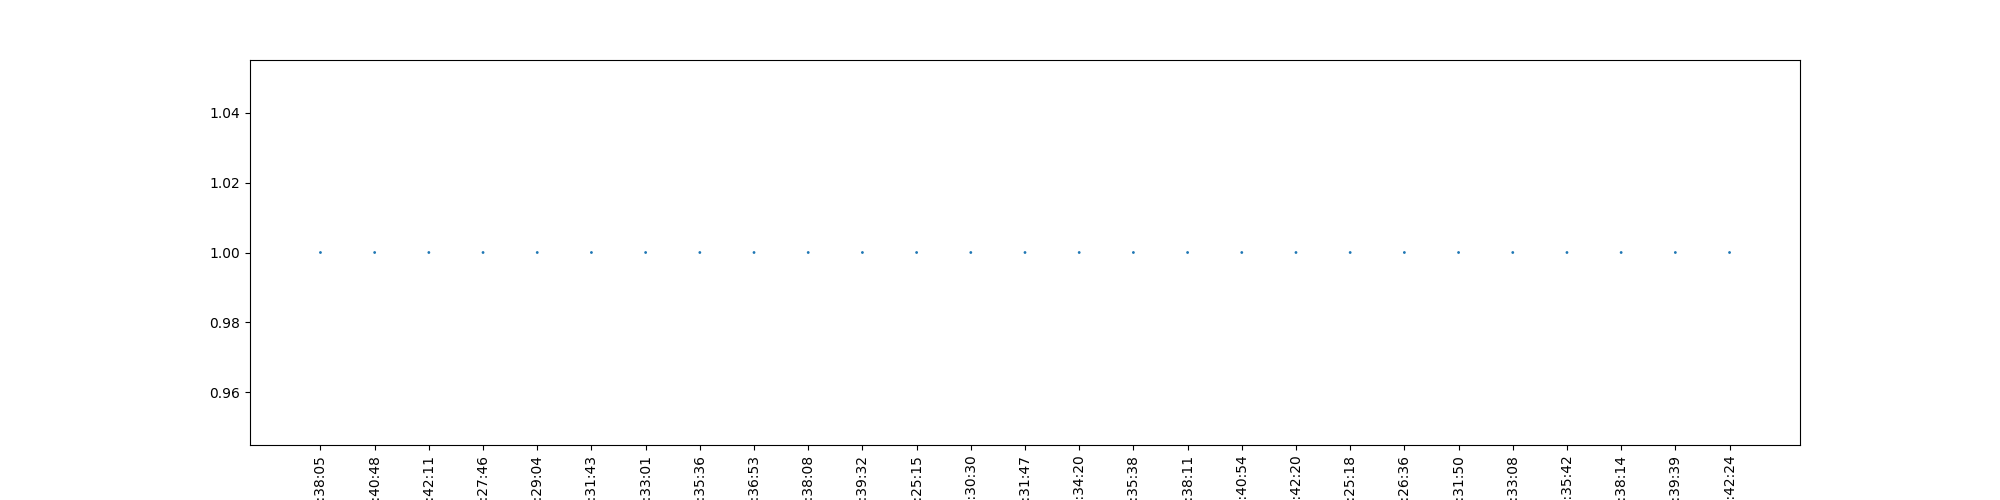

In [17]:
plt.figure(figsize=(20,5))

plt.xticks(rotation=90)
plt.rcParams['axes.labelsize'] = 25
plt.scatter(x=viz_df['time'][200:300], y=viz_df['count'][200:300], s=viz_df['count'][200:300])


plt.show()
%matplot plt

In [18]:
date_series = df.groupby(['date']).size().sort_values(ascending=False)
date_df = pd.DataFrame({'date':date_series.index, 'count':date_series.values})
date_df = date_df.sort_values('date')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
date_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   date  count
0   2021-11-01 01:24:08      1
114 2021-11-01 04:24:18      1
145 2021-11-01 06:24:24      1
146 2021-11-01 07:24:27      1
147 2021-11-01 08:24:30      1

In [20]:
clone_df = date_df[['date', 'count']].copy()
clone_df = clone_df.set_index('date').resample('30min').sum()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
clone_df.index.name = 'date'

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
clone_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                     count
date                      
2021-11-01 01:00:00      1
2021-11-01 01:30:00      0
2021-11-01 02:00:00      0
2021-11-01 02:30:00      0
2021-11-01 03:00:00      0

In [23]:
clone_df['date'] = clone_df.index

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
clone_df['time'] = clone_df['date'].dt.strftime("%H:%M:%S")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
plt.clf()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

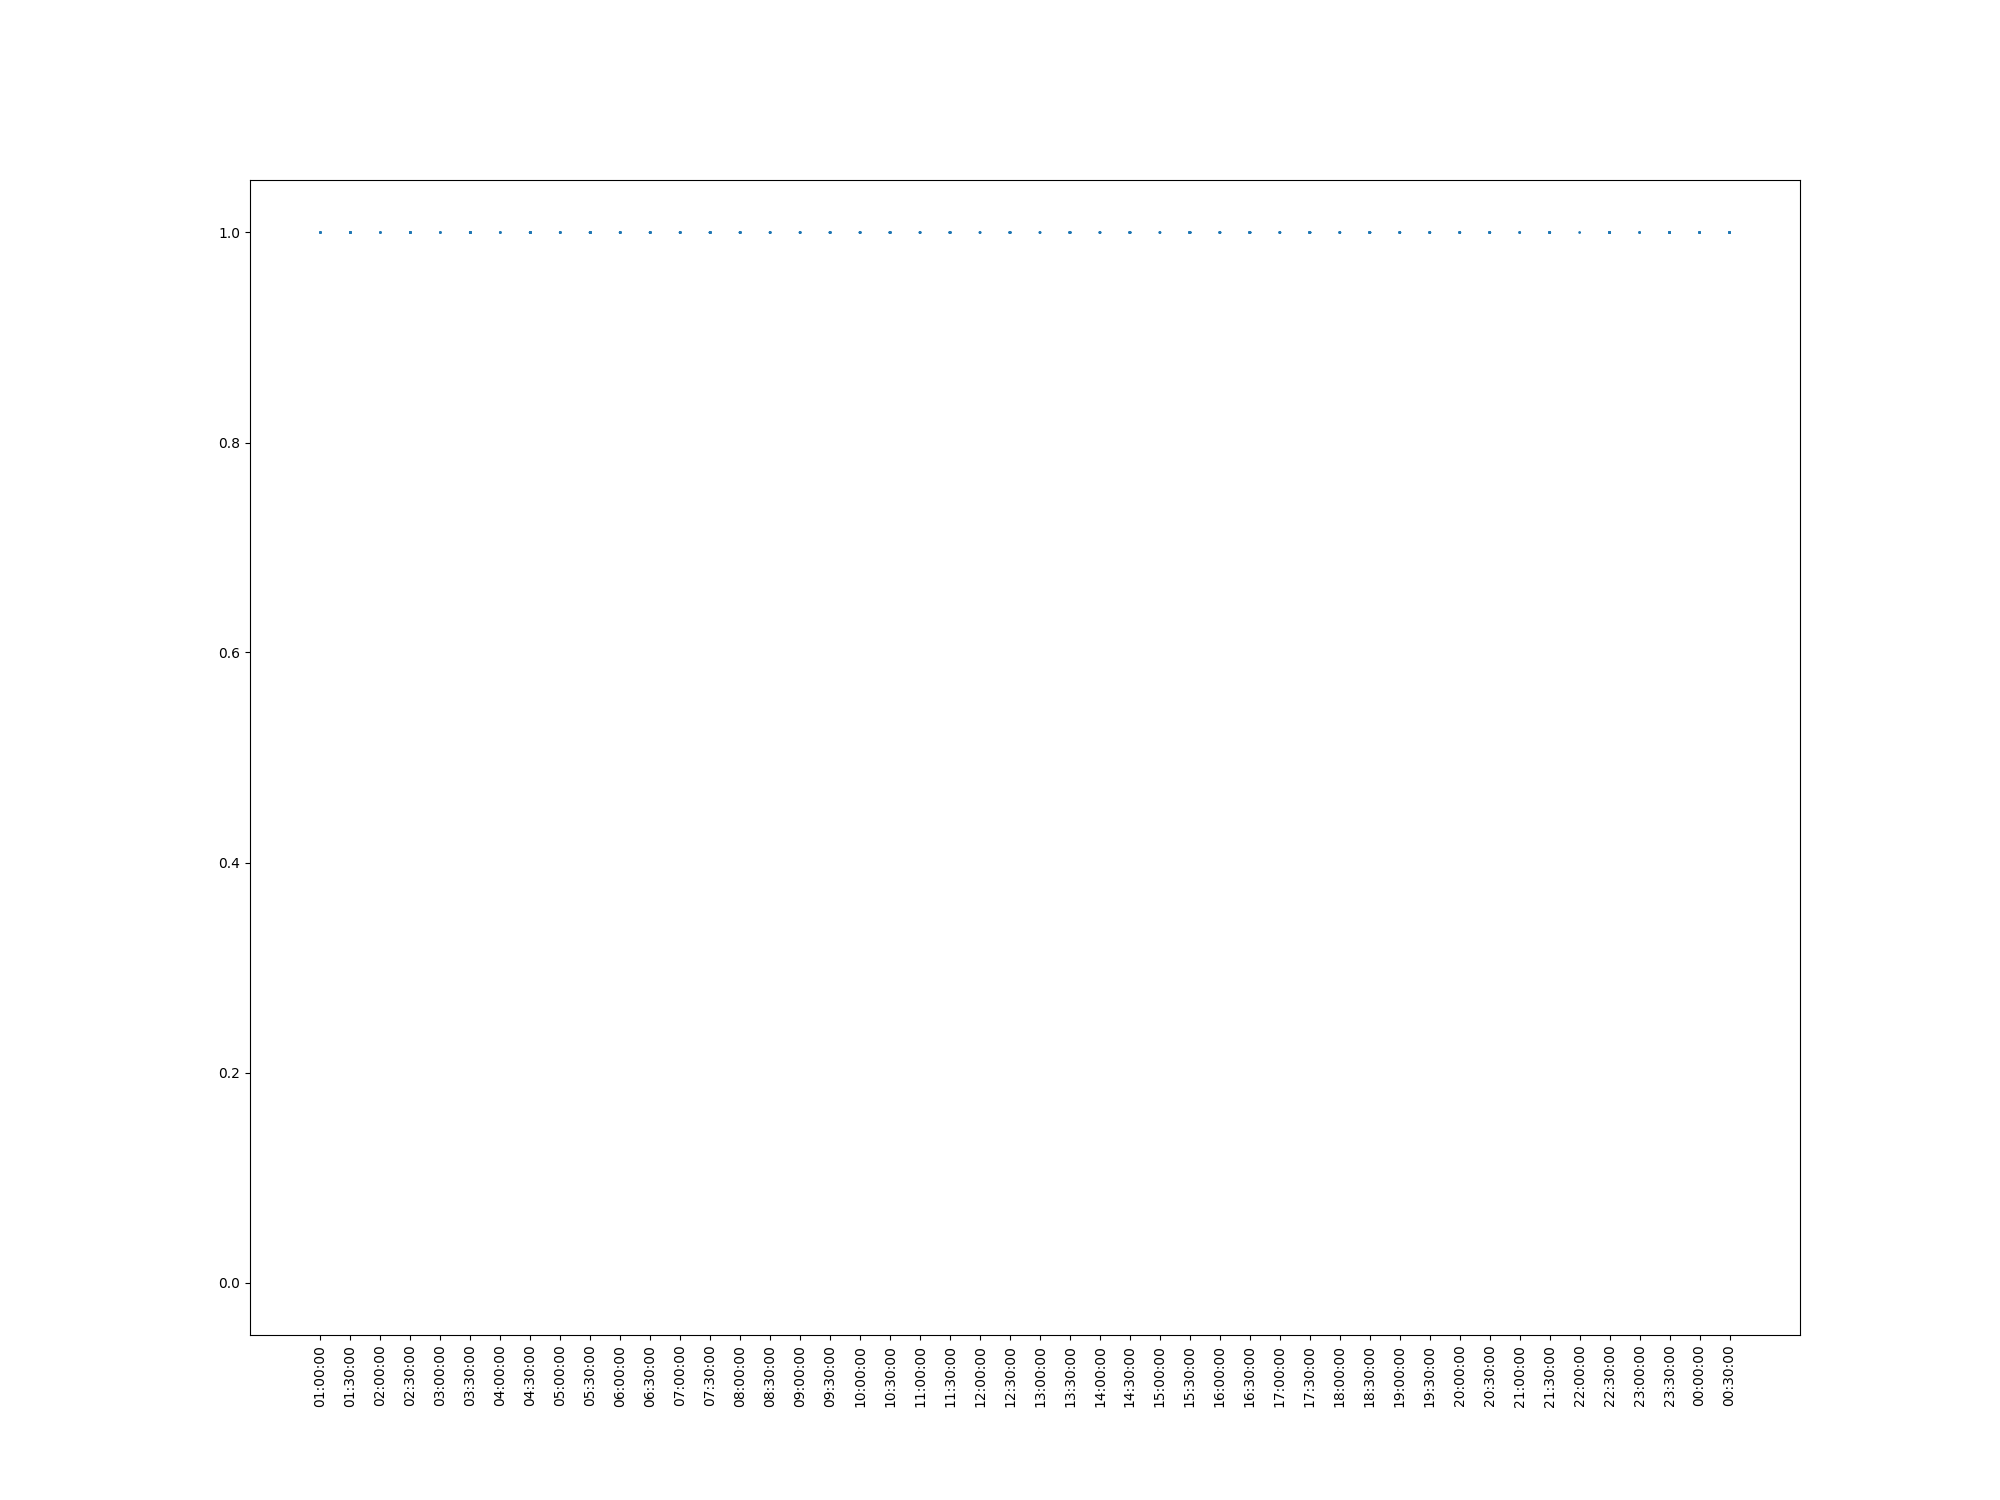

In [26]:
plt.figure(figsize=(20,15))

plt.xticks(rotation=90)
plt.rcParams['axes.labelsize'] = 25
plt.scatter(x=clone_df['time'], y=clone_df['count'], s=clone_df['count'])


plt.show()
%matplot plt

In [27]:
max(clone_df['count'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1

In [28]:
clone_df.loc[clone_df['count'] == 1]


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                     count                date      time
date                                                    
2021-11-01 01:00:00      1 2021-11-01 01:00:00  01:00:00
2021-11-01 04:00:00      1 2021-11-01 04:00:00  04:00:00
2021-11-01 06:00:00      1 2021-11-01 06:00:00  06:00:00
2021-11-01 07:00:00      1 2021-11-01 07:00:00  07:00:00
2021-11-01 08:00:00      1 2021-11-01 08:00:00  08:00:00
2021-11-01 09:00:00      1 2021-11-01 09:00:00  09:00:00
2021-11-01 10:00:00      1 2021-11-01 10:00:00  10:00:00
2021-11-01 13:00:00      1 2021-11-01 13:00:00  13:00:00
2021-11-01 14:00:00      1 2021-11-01 14:00:00  14:00:00
2021-11-01 16:00:00      1 2021-11-01 16:00:00  16:00:00
2021-11-01 18:00:00      1 2021-11-01 18:00:00  18:00:00
2021-11-01 19:00:00      1 2021-11-01 19:00:00  19:00:00
2021-11-01 20:00:00      1 2021-11-01 20:00:00  20:00:00
2021-11-01 22:00:00      1 2021-11-01 22:00:00  22:00:00
2021-11-01 23:00:00      1 2021-11-01 23:00:00  23:00:00
2021-11-02 00:00:00      1 2021

In [29]:
clone_df['count'].mean()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.32152974504249293

In [30]:
date_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   date  count
0   2021-11-01 01:24:08      1
114 2021-11-01 04:24:18      1
145 2021-11-01 06:24:24      1
146 2021-11-01 07:24:27      1
147 2021-11-01 08:24:30      1

In [31]:
date_df['time_delta'] = date_df['date'] - date_df['date'].shift()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
date_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   date  count      time_delta
0   2021-11-01 01:24:08      1             NaT
114 2021-11-01 04:24:18      1 0 days 03:00:10
145 2021-11-01 06:24:24      1 0 days 02:00:06
146 2021-11-01 07:24:27      1 0 days 01:00:03
147 2021-11-01 08:24:30      1 0 days 01:00:03

In [33]:
time_delta_series = date_df.groupby(['time_delta']).size().sort_values(ascending=False)
delta_df = pd.DataFrame({'time_delta':time_delta_series.index, 'count':time_delta_series.values})
delta_df = delta_df.sort_values('time_delta')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
delta_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       time_delta  count
4 0 days 01:00:02     12
0 0 days 01:00:03     83
1 0 days 01:00:04     49
8 0 days 01:00:07      3
7 0 days 02:00:05      6

In [35]:
plt.clf()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

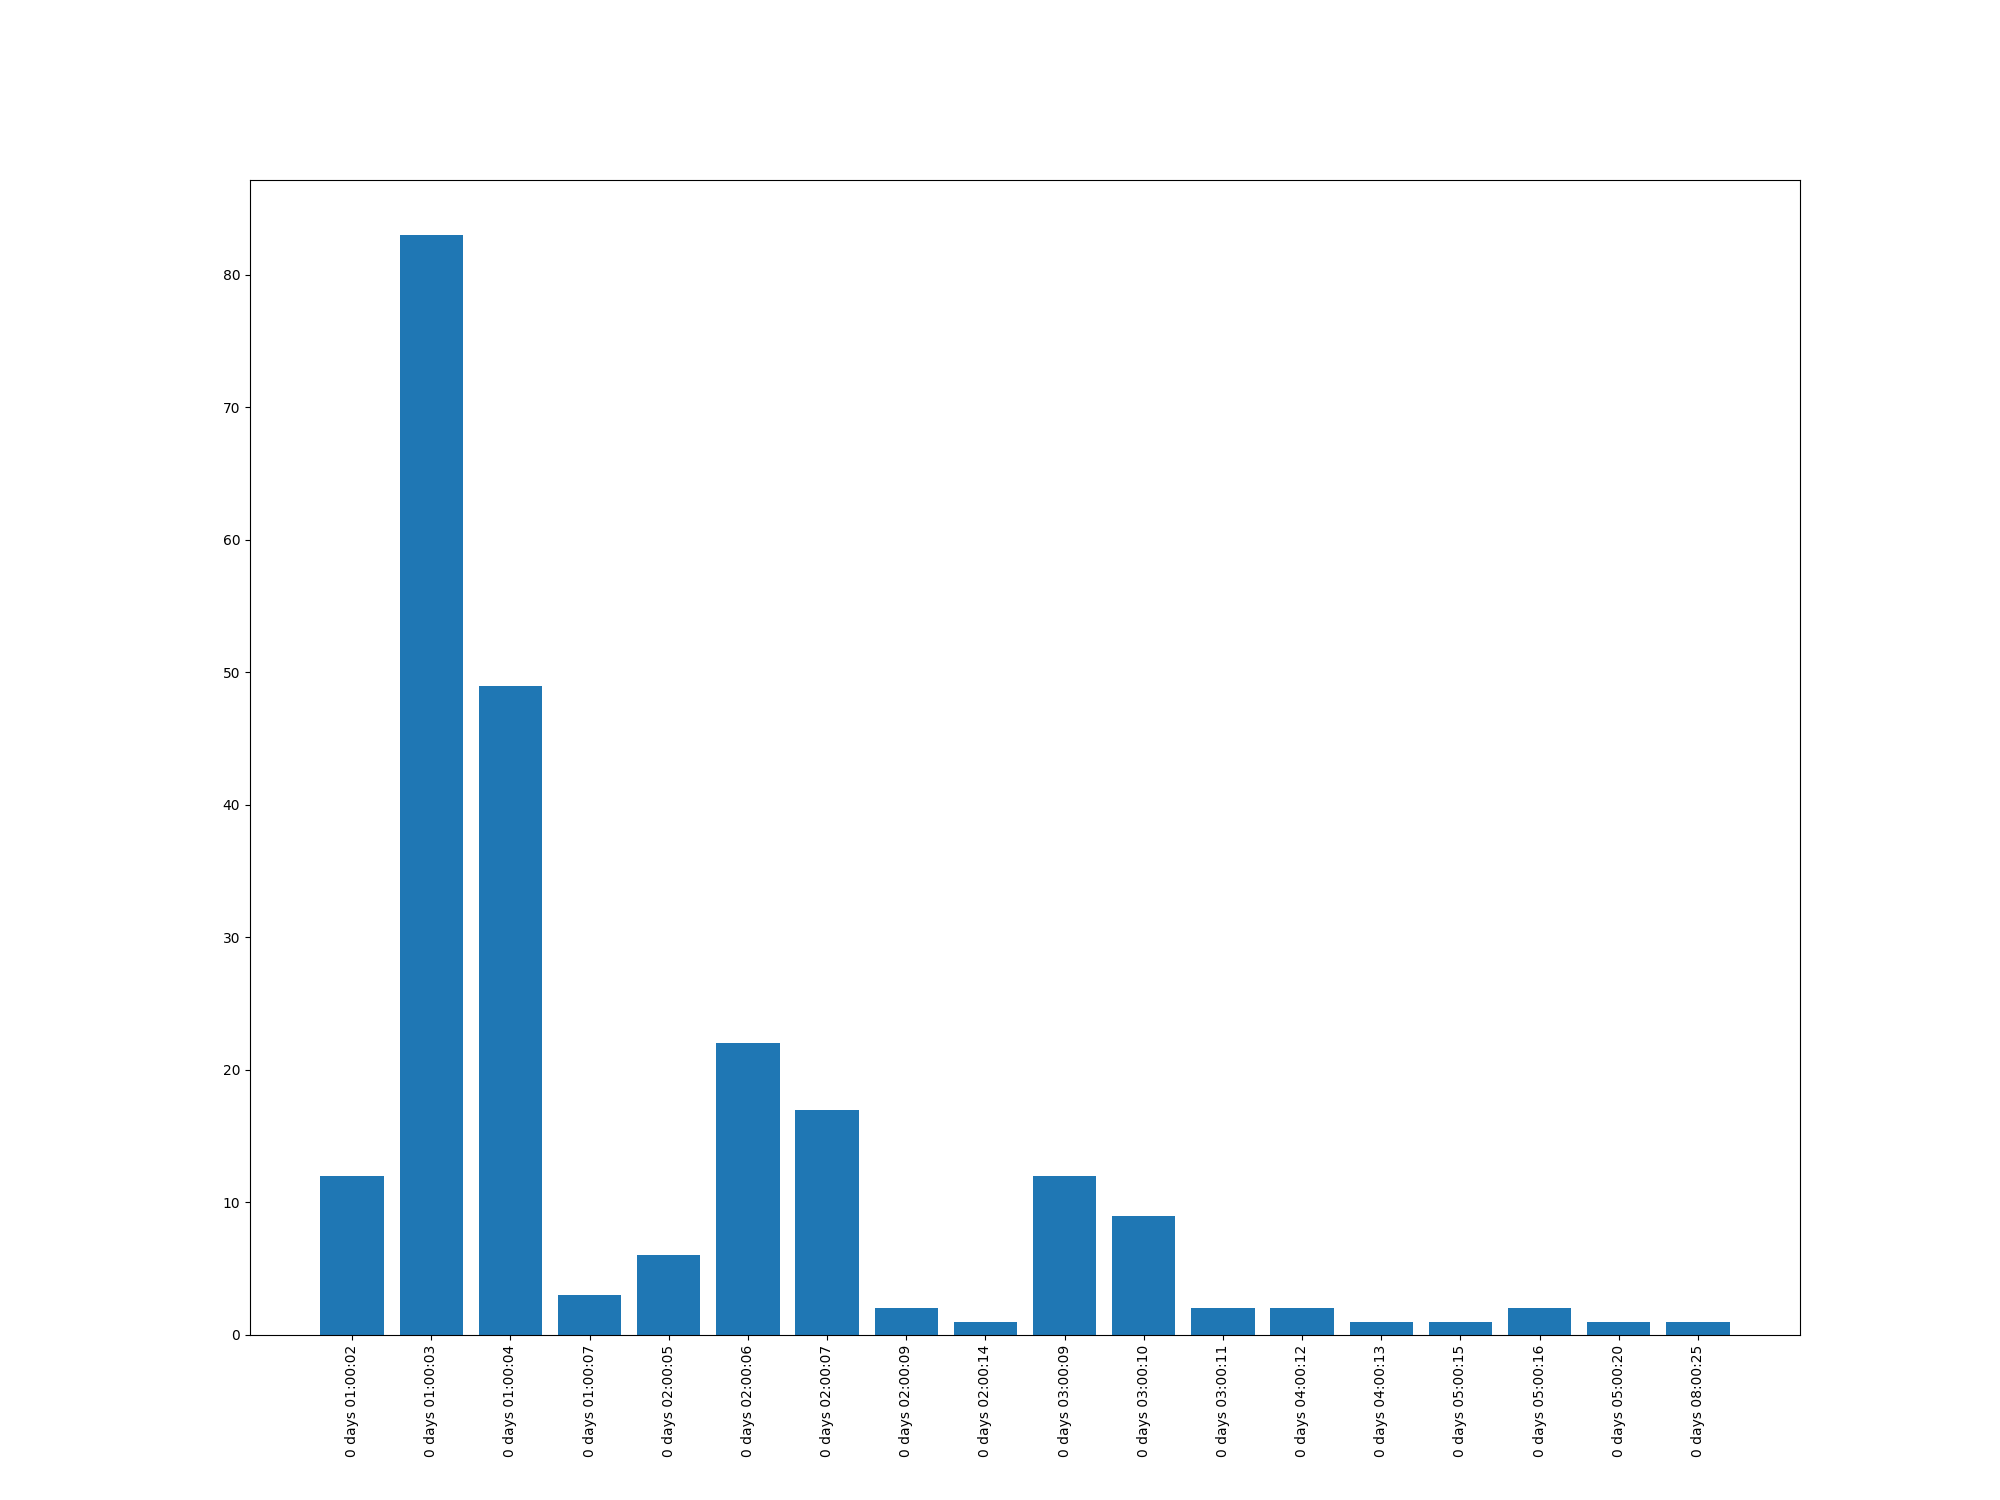

In [37]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)

plt.bar(delta_df['time_delta'].astype(str),delta_df['count'])
plt.show()

%matplot plt